# **PatchNet**

## 1. Prepare code & Data

### Mount Google Drive and make a directory

In [1]:
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

if IN_COLAB:
    # Mount Google Drive and make a directory
    from google.colab import drive
    drive.mount('/content/drive')

    %cd /content

    # Download and unzip data
    !7z x '/content/drive/MyDrive/pnData.zip'

    # Clone repo from github
    username = 'Atamarado'
    repository = 'DLVR_3DReconstruction'

    !git clone https://github.com/{username}/{repository}

    # Pull from the PatchNet branch
    %cd {repository}

    # Change to the implementation's directory
    %cd 'src'

    train_path = "/content/pnData/train"
else:
    train_path = "data/pnData/train"

Mounted at /content/drive
/content

7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/drive/MyDrive/                                 1 file, 3976388571 bytes (3793 MiB)

Extracting archive: /content/drive/MyDrive/pnData.zip
  6% 4096 Open              --
Path = /content/drive/MyDrive/pnData.zip
Type = zip
Physical Size = 3976388571
64-bit = +

  0%      0% 750 - pnData/test/depth_maps/cloth_Ld_bottom_edge_0800.npz                                                                 0% 1056 - pnData/test/depth_maps/cloth_Ll_bottom_edge_0643.npz

## 2. Training



### Imports

In [2]:
# -*- coding: utf-8 -*-
from patch.nets.pnBaseline import TfNetwork
from patch.PatchNet_tf import PatchNet
from DataGenerator import DataGenerator
# from Feed_data import train, test
from Feed_data import train, test, patch_loop_separate_loss, image_loop, patch_loop

### Settings

In [3]:
epochs = 20
patch_size = 128
min_channels = 8
batch_size = 32
# n_train_batches = 80
n_val_batches = 20
fixed_overlaps = True

### Network & DataGenerator

In [4]:
%cd ..

/content/DLVR_3DReconstruction


In [5]:
# train process happens as follows
patchnet = PatchNet(patch_size, min_channels, fixed_overlaps, TfNetwork(patch_size, min_channels))
datagen = DataGenerator(train_path, batch_size, patching = True, patch_size = patch_size, fixed_overlaps = fixed_overlaps)

### Training


In [10]:
history = {
    'train_loss': [],
    'train_depth_loss': [],
    'train_normal_loss': [],
    'validation_loss_patch': [],
    'validation_depth_loss_patch': [],
    'validation_normal_loss_patch': [],
    'validation_loss_image': []
}

In [ ]:
# use train to train patchnet
for epoch in range(5, 10):
        patchnet = load_state(patchnet, epoch)

        # train_loss = patch_loop(patchnet, datagen, validation = False, n_batches=80)
        # train_loss, train_depth_loss, train_normal_loss = patch_loop_separate_loss(patchnet, datagen, validation = False, n_batches=datagen.__train_len__())
        val_loss_patch, val_depth_loss_patch, val_normal_loss_patch = patch_loop_separate_loss(patchnet, datagen, validation = True, n_batches = datagen.__val_len__())
        # val_loss_img = image_loop(patchnet, datagen, n_batches = n_val_batches)
        
        # print(train_loss, train_depth_loss, train_normal_loss)
        print(val_loss_patch, val_depth_loss_patch, val_normal_loss_patch)

        # assert abs(train_loss - (train_depth_loss + train_normal_loss)) < 0.01
        assert abs(val_loss_patch - (val_depth_loss_patch + val_normal_loss_patch)) < 0.01

        print("Epoch", epoch, "done with losses:")
        # print("Training:", train_loss)
        # print("Training depth:", train_depth_loss)
        # print("Training normal:", train_normal_loss)
        print("Validation on patches", val_loss_patch)
        print("Validation on patches depth", val_depth_loss_patch)
        print("Validation on patches normal", val_normal_loss_patch)
        # print("Validation on images:", val_loss_img)

        # history['train_loss'].append(train_loss)
        # history['train_depth_loss'].append(train_depth_loss)
        # history['train_normal_loss'].append(train_normal_loss)
        history['validation_loss_patch'].append(val_loss_patch)
        history['validation_depth_loss_patch'].append(val_depth_loss_patch)
        history['validation_normal_loss_patch'].append(val_normal_loss_patch)
        # history['validation_loss_image'].append(val_loss_img)

        # patchnet.network.encoder.layers.save_weights(f'/content/drive/MyDrive/PatchNet/weights/full_set_26/epoch_{epoch}_encoder')
        # patchnet.network.depth_decoder.layers.save_weights(f'/content/drive/MyDrive/PatchNet/weights/full_set_26/epoch_{epoch}_depth')
        # patchnet.network.normals_decoder.layers.save_weights(f'/content/drive/MyDrive/PatchNet/weights/full_set_26/epoch_{epoch}_normals')
        

Validation progress (patches): 100%|██████████| 133/133 [03:46<00:00,  1.70s/it]


tf.Tensor(1.2804714, shape=(), dtype=float32) tf.Tensor(0.061837837, shape=(), dtype=float32) tf.Tensor(1.2186334, shape=(), dtype=float32)
Epoch 5 done with losses:
Validation on patches tf.Tensor(1.2804714, shape=(), dtype=float32)
Validation on patches depth tf.Tensor(0.061837837, shape=(), dtype=float32)
Validation on patches normal tf.Tensor(1.2186334, shape=(), dtype=float32)


Validation progress (patches):  34%|███▍      | 45/133 [01:07<02:12,  1.50s/it]

In [ ]:
!zip -r /content/weights.zip /content/weights

In [ ]:
for epoch in range(epochs):
        # train_loss = patch_loop(patchnet, datagen, validation = False, n_batches=80)
        train_loss, train_depth_loss, train_normal_loss = patch_loop_separate_loss(patchnet, datagen, validation = False, n_batches=80)
        # val_loss_patch, val_depth_loss_patch, val_normal_loss_patch = patch_loop_separate_loss(patchnet, datagen, validation = True, n_batches = n_val_batches)
        # val_loss_img = image_loop(patchnet, datagen, n_batches = n_val_batches)
        
        print(train_loss, train_depth_loss, train_normal_loss)

## Load Weights

In [ ]:
!unzip '/content/weights.zip' -d '/' 

In [ ]:
patchnet = PatchNet(patch_size, min_channels, fixed_overlaps, TfNetwork(patch_size, min_channels))
datagen = DataGenerator(train_path, batch_size, patching = True, patch_size = patch_size, fixed_overlaps = fixed_overlaps)

In [7]:
def load_state(patchnet, epoch):
  patchnet.network.encoder.layers.load_weights(f'/content/drive/MyDrive/PatchNet/weights/full_set_26/epoch_{epoch}_encoder')
  patchnet.network.depth_decoder.layers.load_weights(f'/content/drive/MyDrive/PatchNet/weights/full_set_26/epoch_{epoch}_depth')
  patchnet.network.normals_decoder.layers.load_weights(f'/content/drive/MyDrive/PatchNet/weights/full_set_26/epoch_{epoch}_normals')
  return patchnet

In [9]:
patchnet = load_state(patchnet, 12)

# Plots

## Plotting of patching

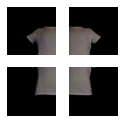

In [ ]:
from matplotlib import gridspec

instance = 3
start_index = 4 * instance

plt.figure(figsize = (2,2))
gs = gridspec.GridSpec(2, 2)
gs.update(wspace=0.25, hspace=0.25) # set the spacing between axes. 

for i in range(4):
  ax1 = plt.subplot(gs[i])
  # plt.subplot(330 + i + 1)
  ax1.axis('off')
  ax1.set_aspect('equal')
  ax1.imshow(tf.cast(x[i + start_index, :, :, :3], dtype=tf.int32))

plt.savefig('/content/fixed_overlap.pdf', bbox_inches='tight')

# Plotting of predictions

In [ ]:
import tensorflow as tf
from patch.Losses import depth_loss
import numpy as np

In [ ]:
x, y = datagen.__getitem__(0, raw_depth=False)
pred_depth, pred_normal = patchnet(x[:,:,:,:3])

In [ ]:
depth_gt = y[0, :, :, 0].numpy()
normal_gt = y[0, :, :, 1:].numpy()

In [ ]:
import numpy as np

## Plotting ground-truth normal

-0.9999372 0.679575
-1.0 0.7561235
-1.0 0.7561235
-1.0 0.679588
-1.0 0.9434305
-1.0 0.9434305
-1.0 0.679588
-1.0 0.94859093
-1.0 0.94859093


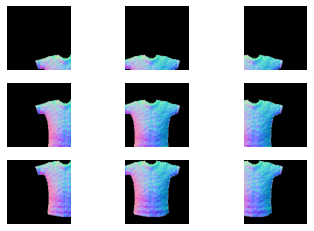

In [ ]:
for i in range(9):
  normal_gt = y[i, :, :, 1:].numpy()

  iszero = np.sum(normal_gt == 0, axis=-1)
  foreground_mask = (iszero != 3).astype(np.float32).reshape((patch_size, patch_size, 1))

  # rel_depth_gt = depth_gt - depth_gt.sum() / foreground_mask.sum()
  # rel_depth_gt[depth_gt == 0] = 0

  print(normal_gt.min(), normal_gt.max())

  normal_gt_rgb = normal_gt * 0.5 - 0.5 

  plt.subplot(330 + i + 1)
  plt.gca().axis('off')
  plt.gca().set_facecolor((0, 0, 0))
  plt.gca().add_artist(plt.gca().patch)
  plt.gca().patch.set_zorder(-1)
  plt.imshow(np.concatenate([-normal_gt_rgb, foreground_mask], axis=-1))

## Plotting predicted normal

In [ ]:
depth_pred = pred_depth.numpy()
normal_pred = pred_normal.numpy()

-1.0817204 0.38259077
-1.1415774 0.3628899
-1.0916077 0.34091878
-1.1281254 0.43814468
-1.1355927 0.34363532
-1.1093996 0.46479654
-1.1252762 0.38368
-1.0957264 0.42724228
-1.1003861 0.46292365


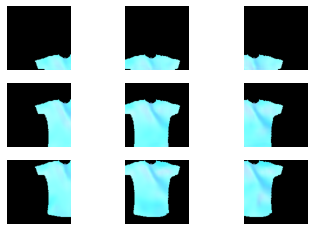

In [ ]:
for i in range(9):
  normal_gt = y[i, :, :, 1:].numpy()
  normal_pr = normal_pred[i + 9, :, :, 1:]

  iszero = np.sum(normal_gt == 0, axis=-1)
  foreground_mask = (iszero != 3).astype(np.float32).reshape((patch_size, patch_size, 1))

  # normal_pr_rgb = normal_pr - (normal_pr * foreground_mask).max()
  # normal_pr_rgb = normal_pr_rgb / - (normal_pr_rgb * foreground_mask).min()

  print(normal_pr.min(), normal_pr.max())

  normal_pr_rgb = normal_pr * 0.5 - 0.5

  normal_pr_rgb = normal_pr_rgb * foreground_mask

  plt.subplot(330 + i + 1)
  plt.gca().axis('off')
  plt.gca().set_facecolor((0, 0, 0))
  plt.gca().add_artist(plt.gca().patch)
  plt.gca().patch.set_zorder(-1)
  plt.imshow(np.concatenate([-normal_pr_rgb, foreground_mask], axis=-1))

## Plotting ground-truth depth

-0.15912336 1.4218767
-0.25256523 1.3504348
-0.17869964 1.4243004
-0.40764368 1.1733563
-0.6320804 0.97091967
-0.47863427 1.1243658
-0.47119325 1.1098068
-0.7262986 0.8767015
-0.55507815 1.0479219


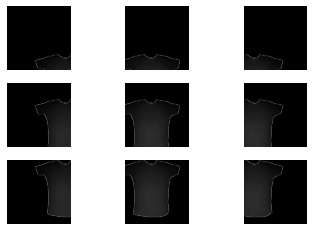

In [ ]:
for i in range(9):
  depth_gt = y[i, :, :, 0].numpy()

  background = y[i, :, :, 0].numpy()[0][0]

  foreground_mask = (depth_gt != background).astype(np.float32)

  # print(depth_gt)

  # rel_depth_gt = depth_gt - depth_gt.sum() / foreground_mask.sum()
  # rel_depth_gt[depth_gt == depth_gt[0]] = 0

  print(depth_gt.min(), depth_gt.max())

  plt.subplot(330 + i + 1)
  plt.gca().axis('off')
  plt.gca().set_facecolor((0, 0, 0))
  plt.gca().add_artist(plt.gca().patch)
  plt.gca().patch.set_zorder(-1)
  plt.imshow(depth_gt, cmap='binary', alpha=foreground_mask)

## Plotting predicted depth

0.0 1.581
0.0 1.603
0.0 1.603
0.0 1.581
0.0 1.603
0.0 1.603
0.0 1.581
0.0 1.603
0.0 1.603


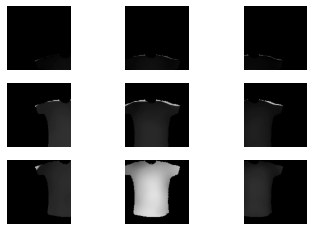

In [ ]:
for i in range(9):
  depth_gt = y[i, :, :, 0].numpy()
  depth_pr = pred_depth[i, :, :, 0].numpy()

  foreground_mask = (depth_gt != 0).astype(np.float32)

  # print(depth_gt)

  # rel_depth_gt = depth_gt - depth_gt.sum() / foreground_mask.sum()
  # rel_depth_gt[depth_gt == depth_gt[0]] = 0

  print(depth_gt.min(), depth_gt.max())

  plt.subplot(330 + i + 1)
  plt.gca().axis('off')
  plt.gca().set_facecolor((0, 0, 0))
  plt.gca().add_artist(plt.gca().patch)
  plt.gca().patch.set_zorder(-1)
  plt.imshow(depth_pr, cmap='binary', alpha=foreground_mask)

# Plotting losses

## Plotting depth loss distribution

In [ ]:
from patch.Losses import depth_loss

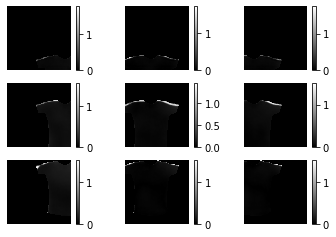

In [ ]:
for i in range(9):
  depth_gt = y[i, :, :, 0]
  depth_pr = pred_depth[i, :, :, 0]

  background = y[0, :, :, 0][0][0].numpy()

  foreground_mask = x[i, :, :, 3]

  depth_pr_tensor = tf.reshape(depth_pr, (depth_pr.shape[0], depth_pr.shape[0], 1))
  depth_gt_tensor = tf.reshape(depth_gt, (depth_pr.shape[0], depth_pr.shape[0], 1))
  foreground_mask_tensor = tf.reshape(foreground_mask, (depth_pr.shape[0], depth_pr.shape[0], 1))

  loss = depth_loss(depth_pr_tensor, depth_gt_tensor, foreground_mask_tensor)
  loss_tensor = depth_loss(depth_pr_tensor, depth_gt_tensor, foreground_mask_tensor, per_pixel=False)

  loss_np = tf.reshape(loss_tensor, (patch_size, patch_size)).numpy()


  min_loss = loss_np.min()
  max_loss = loss_np.max()
  loss_np[loss_np == 0] = np.nan

  plt.subplot(330 + i + 1)
  plt.gca().axis('off')
  plt.gca().set_facecolor((0, 0, 0))
  plt.gca().add_artist(plt.gca().patch)
  plt.gca().patch.set_zorder(-1)
  plt.imshow(loss_np, vmin=min_loss, vmax=max_loss, cmap='binary_r')
  plt.colorbar()

plt.savefig('/content/depth_losses.pdf', bbox_inches='tight')

## Plotting loss curve

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
plt.clf()
plt.title('Training Losses')
plt.plot(history['train_loss'], label='Total Loss')
plt.plot(history['train_depth_loss'], label='Depth Loss')
plt.plot(history['train_normal_loss'], label='Normal Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.yscale('log')
plt.legend()
plt.savefig(fname='/content/training_separate_losses.jpg', pad_inches=0.2, bbox_inches='tight')
# plt.plot(history['validation_loss_image'])
# plt.show()


In [ ]:
fig, ax1 = plt.subplots()

plt.title('Training Losses')

ax2 = ax1.twinx()
ax1.plot(history['train_loss'], 'r-', label='Total Loss')
ax1.plot(history['train_normal_loss'], 'g-', label='Normal Loss')
ax2.plot(history['train_depth_loss'], 'b-', label='Depth Loss')

ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
fig.legend()
# ax2.set_ylabel('Y2 data', color='b')

plt.savefig('/content/training_separate_losses.jpg')
# plt.show()